In [1]:
%matplotlib inline
from pylab import *

import detectorgeometry as geom
reload(geom)

import detectorgeometry_trap as geom_trap
reload(geom_trap)

import detectorgeometry_071719 as geom_new
reload(geom_new)

<module 'detectorgeometry_071719' from 'detectorgeometry_071719.pyc'>

In [2]:
h = 35.5 #km
R = 6356. # km
theta_view = radians(1) #degrees
N = 5000000 # number of samples

theta_src = radians(0)
area = geom_trap.Area(theta_src,h,R,theta_view, N)
A_deg, e_phi, e_theta, view_angle, exit_angle, emg_angle, norm, e_dot, A0, N0= area.event_retention()
# earth_t_min, earth_t_max, phi_E_min, phi_E_max = area.earth_patch(area.t_src,area.phi_src, area.th_v)
# r_x, r_y, r_z = area.coords(area.t_src, area.phi_src + np.pi) 
# t_e,phi_e = area.earth_locs(earth_t_min, earth_t_max, phi_E_min, phi_E_max)
# e_x,e_y,e_z = area.coords(t_e,phi_e)
# dot = area.dot_prod(e_x,e_y,e_z,r_x, r_y,r_z)
# view_angle,exit_angle, flight_path = area.view_angle_dist_det(e_x,e_y,e_z,r_x, r_y,r_z)


detectorgeometry_trap.py:54: RuntimeWarning: invalid value encountered in double_scalars
  arg2 = (self.h * np.tan(theta_src)) /(4*np.pi*np.sin(earth_t)*self.R)


6.283167772564183
9.747648549183799e-05


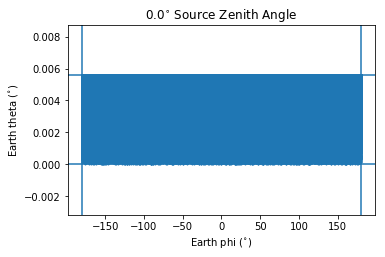

In [3]:
#print A, e_phi, view_angle
fig = plt.figure(figsize=(5.5,3.5))

plt.scatter(degrees(e_phi)-180, degrees(e_theta),s=1)
plt.axvline(degrees(min(e_phi))-180)
plt.axvline(degrees(max(e_phi))-180)
plt.xlabel("Earth phi "+r'($^{\circ}$)')

# plt.scatter(radians(degrees(e_phi)-180), degrees(e_theta),s=1)
# plt.axvline(radians(degrees(min(e_phi))-180))
# plt.axvline(radians(degrees(max(e_phi))-180))
# plt.xlabel("Earth phi (radians)")

plt.ylabel("Earth theta "+r'($^{\circ}$)')
plt.axhline(degrees(min(e_theta)))
plt.axhline(degrees(max(e_theta)))

print radians(max(degrees(e_phi))-min(degrees(e_phi)))
print radians(max(degrees(np.unwrap(e_theta)))-min(degrees(np.unwrap(e_theta))))
            

# plt.scatter(e_phi, e_theta,s=1)
# plt.xlabel("Earth phi (rad)")
# plt.ylabel("Earth theta (rad)")
# plt.axhline(min(e_theta))
# plt.axhline(max(e_theta))
# plt.axvline(min(e_phi))
# plt.axvline(max(e_phi))

plt.title(str(round(degrees(theta_src),1))+r'$^{\circ}$'+" Source Zenith Angle")
#plt.ylim(0.8*min(degrees(samp_t_e) ),1.2*max(degrees(samp_t_e) ))

plt.show()



In [ ]:
area2 = geom_trap.Area(radians(1),h,R,theta_view, N)
print degrees(area2.thetaE_nadir(radians(1)))
print (2*pi*R**2)*(1-np.cos(area2.thetaE_nadir(radians(1))))

In [ ]:
h = 35.5 #km
R = 6356. # km
theta_view = radians(1) #degrees
N = 10000000 # number of samples

areas1=[]
areas2=[]

start = 0 # minimum source declination in degrees
end = 80 # maximum source declination in degrees
steps=80 # divisions indeclination used to generate plot
x1 = np.linspace(-(90-start),-(90-end),steps)
for j in range(0,steps):
    theta = radians(start+(end-start)*float(j)/steps)
    
    area1 = geom.Area(theta,h,R,theta_view, N)
    A1 = area1.degree_eff_area()
    
    area2 = geom_trap.Area(theta,h,R,theta_view, N)
    A2, phi_e, theta_e, view_angle, exit_angle, emg_angle, norm, e_dot, A0, N0= area2.event_retention()
 
    areas1.append(A1)
    areas2.append(A2)
    print degrees(theta),A1, A2
    print "   "


    
start = 80 # minimum source declination in degrees
end = 90 # maximum source declination in degrees
steps=100 # divisions indeclination used to generate plot
x2 = np.linspace(-(90-start),-(90-end),steps)
for j in range(0,steps):
    theta = radians(start+(end-start)*float(j)/steps)
    
    area1 = geom.Area(theta,h,R,theta_view, N)
    A1 = area1.degree_eff_area()
    
    area2 = geom_trap.Area(theta,h,R,theta_view, N)
    A2, phi_e, theta_e, view_angle, exit_angle, emg_angle, norm, e_dot, A0, N0= area2.event_retention()
 
    areas1.append(A1)
    areas2.append(A2)
    print degrees(theta),A1, A2
    print "   "


0.0 1.550836055735679 1.2062049653436873
   
1.0 1.4096335887140217 1.2064458319983609
   
2.0 1.4089832668430644 1.204197911000696
   
3.0000000000000004 1.1263164673882067 1.2077195272645715
   
4.0 1.828291121526584 1.2121266739405034
   
5.0 1.4044235460043661 1.2152034159436047
   
6.000000000000001 1.6824521500295428 1.2193505885261857
   
7.0 1.3992208629615497 1.229124333581067
   
8.0 0.9771827258957738 1.2276891951836502
   
9.0 0.8353820787222465 1.2361945666794032
   
10.0 1.5270177090095844 1.2410577630732818
   
11.0 0.8301951686882497 1.2473877076927797
   
12.000000000000002 0.8272218830834777 1.2556100064422269
   
13.0 1.0986447051642731 1.2727665301386903
   
14.0 0.8205014686518801 1.277019581067588
   
14.999999999999998 0.8167550989008155 1.2937884940693918
   
16.0 1.3546030441080197 1.312334847988275
   
17.0 1.0780456170379615 1.3149113087633852
   
18.0 1.74207694192714 1.3373977944573878
   
19.0 1.46536704956181 1.3451243054813418
   
20.0 1.191455159316651 

In [ ]:
# Creating a plot for the full range of possible source declinations 
fig = plt.figure(figsize=(7,7))
ax = plt.axes()
x_full = np.concatenate((x1,x2))

ax.plot(x_full, areas1)
ax.plot(x_full, areas2)
    
horizon = degrees(np.arcsin(R / (R+h)))-90
#plt.xlim(-10,0)  
legend = ax.legend(["Full Cap", "Trapezoid"], fontsize=14)
plt.xlabel("Payload Elevation Angle of Source "+r'$\theta_{ele}$'+" (degrees)", fontsize=18)
plt.ylabel(r'$\langle A \rangle_g$'+" "+r'$[km^2]$', fontsize=18)
plt.title("Geometric Effective Area", fontsize=20)
plt.setp(legend.get_title(),fontsize='x-large')
ax.tick_params(axis = 'both', which = 'major', labelsize = 16)
plt.grid(True,which='both')
plt.semilogy()